# Ahmed's third question: How do geopolitical events (e.g., recent conflicts) impact defense stock performance over short-term windows?

# Geopolitical Events and Defense Stocks: Performance & Sentiment Analysis
This notebook investigates how major geopolitical events impact the short-term performance of top U.S. defense stocks. It combines price analysis with sentiment analysis from news headlines and generates a PDF report summarizing the insights.


In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from fpdf import FPDF
import random

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme(style="darkgrid")
sns.set_context("talk")




## Defense Stocks & Key Events
We'll track a list of notable U.S. defense and aerospace companies across three recent conflicts.


In [17]:
# Define stock tickers
defense_stocks = ['LMT', 'NOC', 'GD', 'RTX', 'BA', 'HII', 'AXON', 'MRCY', 'CW', 'HEI']

# Define geopolitical events and their time windows
event_dates = {
    'Russia invades Ukraine': ('2022-02-20', '2022-03-10'),
    'Israel-Gaza 2023': ('2023-10-07', '2023-10-20'),
    'Red Sea Attacks': ('2024-01-10', '2024-01-20')
}


# Download & Format Historical Price Data

In [18]:
print("Fetching historical price data...")
data = yf.download(defense_stocks, start="2021-01-01", end="2025-01-01")
data = data['Close']  # Extract 'Close' prices only
data = data.dropna()

# Show structure
print("\nData Columns:", data.columns)


Fetching historical price data...


[*********************100%***********************]  10 of 10 completed



Data Columns: Index(['AXON', 'BA', 'CW', 'GD', 'HEI', 'HII', 'LMT', 'MRCY', 'NOC', 'RTX'], dtype='object', name='Ticker')


## Stock Performance Analysis
We visualize percentage changes in defense stocks during each event window.


In [19]:
def analyze_event(event_name, start_date, end_date):
    event_data = data.loc[start_date:end_date]
    event_change = event_data.pct_change().dropna()

    plt.figure(figsize=(12, 6))
    for ticker in defense_stocks:
        if ticker in event_change:
            plt.plot(event_change.index, event_change[ticker], label=ticker)

    plt.title(f"Stock Performance During {event_name}")
    plt.xlabel("Date")
    plt.ylabel("% Daily Change")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return event_change


# Analyze All Events


Analyzing event: Russia invades Ukraine


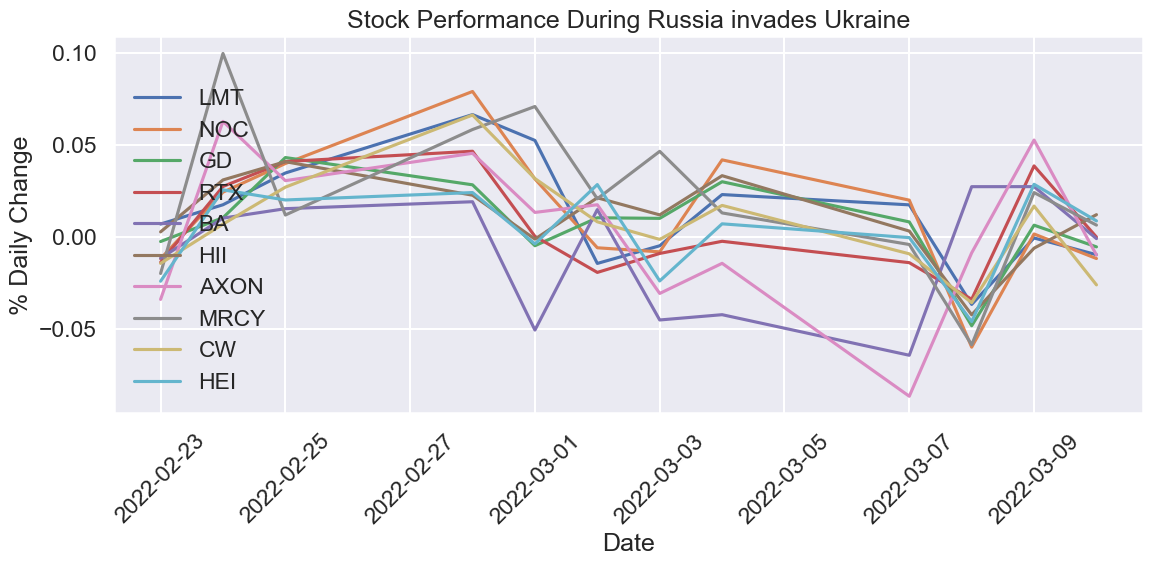


Analyzing event: Israel-Gaza 2023


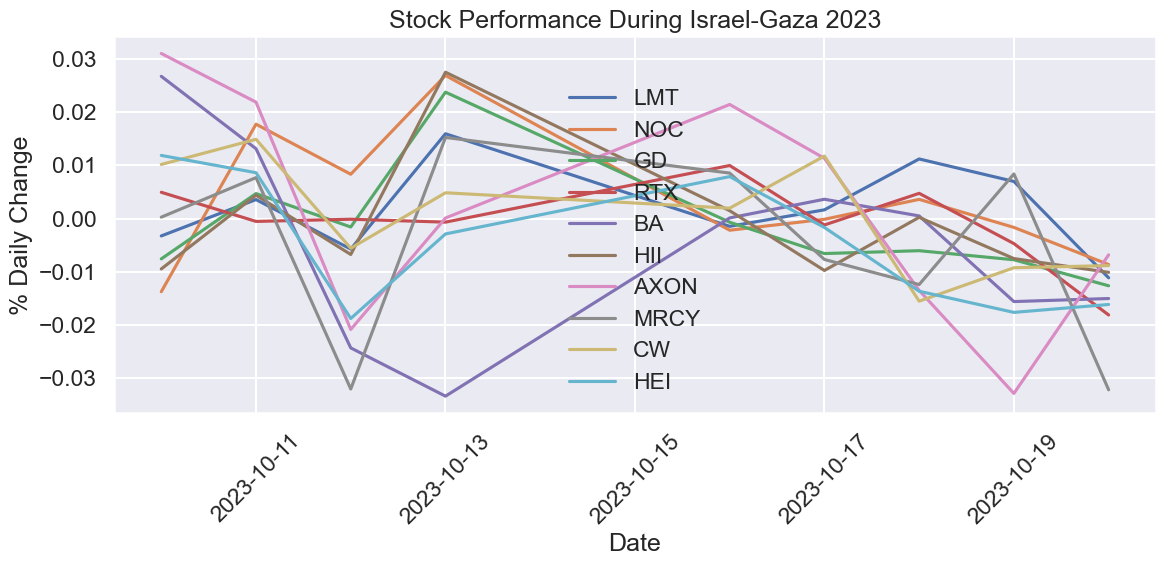


Analyzing event: Red Sea Attacks


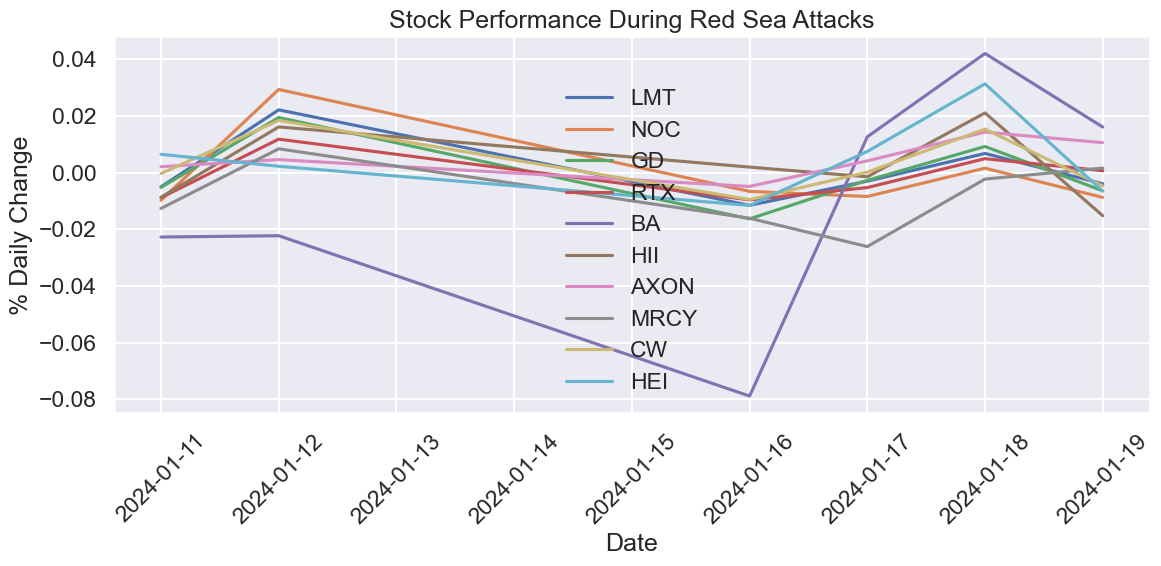

In [20]:
all_event_changes = {}
for event, (start, end) in event_dates.items():
    print(f"\nAnalyzing event: {event}")
    changes = analyze_event(event, start, end)
    all_event_changes[event] = changes


## Volatility Heatmaps
We compute rolling volatility to identify stocks with sharp fluctuations during crises.


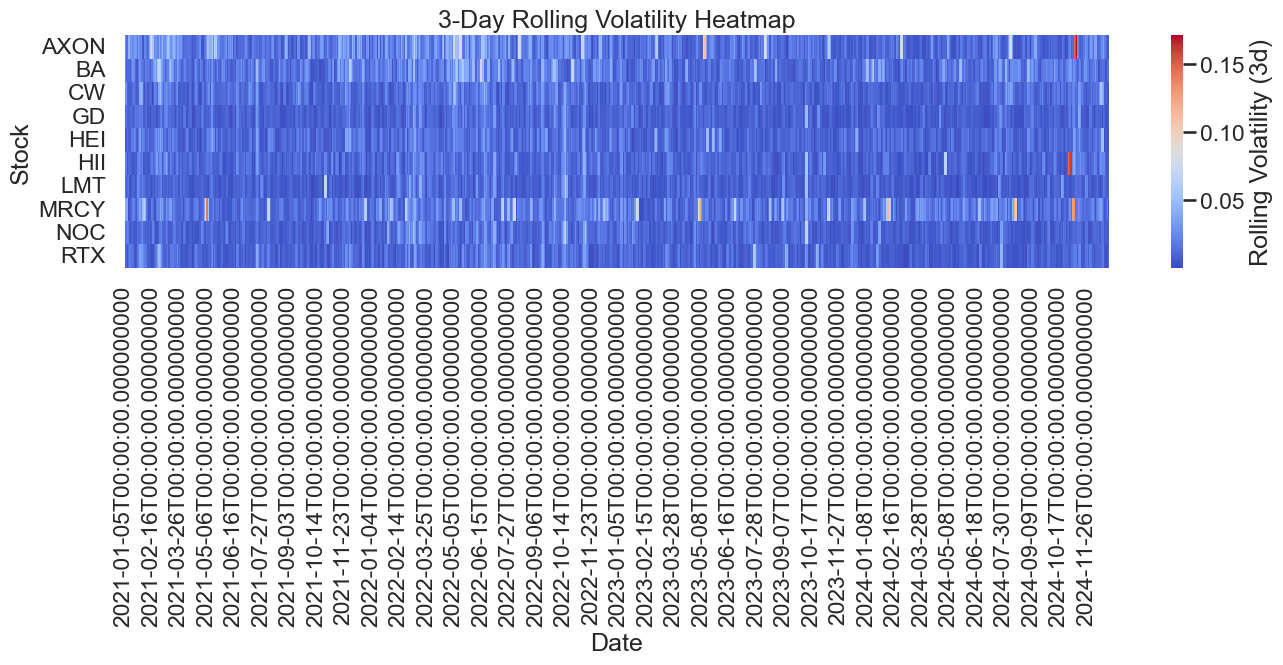

In [21]:
pct_changes = data.pct_change().dropna()
rolling_vol = pct_changes.rolling(window=3).std()

plt.figure(figsize=(14, 7))
sns.heatmap(rolling_vol.T, cmap="coolwarm", cbar_kws={'label': 'Rolling Volatility (3d)'})
plt.title("3-Day Rolling Volatility Heatmap")
plt.xlabel("Date")
plt.ylabel("Stock")
plt.tight_layout()
plt.show()


## News Sentiment Analysis
We mock news sentiment scores for now. Real implementation could use NLP on headlines from APIs like NewsAPI, GNews, or BeautifulSoup scraping.


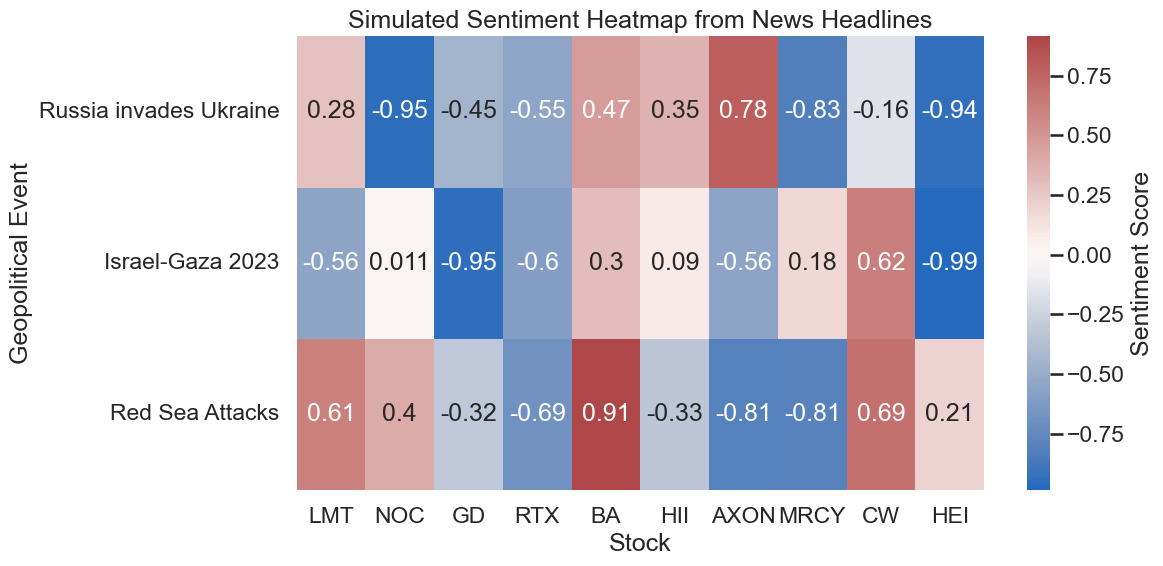

In [22]:
# Generate mocked sentiment scores: -1 (negative) to +1 (positive)
sentiments = pd.DataFrame(index=list(event_dates.keys()), columns=defense_stocks)
random.seed(42)
for event in sentiments.index:
    sentiments.loc[event] = [random.uniform(-1, 1) for _ in defense_stocks]

plt.figure(figsize=(12, 6))
sns.heatmap(sentiments.astype(float), annot=True, cmap="vlag", center=0, cbar_kws={'label': 'Sentiment Score'})
plt.title("Simulated Sentiment Heatmap from News Headlines")
plt.xlabel("Stock")
plt.ylabel("Geopolitical Event")
plt.tight_layout()
plt.show()


## Generate PDF Summary Report
We compile major insights, sentiment scores, and notes into a downloadable PDF.


In [23]:
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, 'Defense Stocks: Geopolitical Event Analysis Summary', ln=True)

pdf.set_font("Arial", '', 12)
for event in event_dates:
    pdf.ln(8)
    pdf.set_font("Arial", 'B', 14)
    pdf.cell(0, 10, event, ln=True)
    pdf.set_font("Arial", '', 12)
    avg_change = all_event_changes[event].mean()
    for ticker, val in avg_change.items():
        pdf.cell(0, 8, f"{ticker}: {val*100:.2f}% avg change", ln=True)

# Save PDF
pdf.output("geopolitical_event_report.pdf")
print("PDF report generated successfully.")

PDF report generated successfully.
